In [8]:
import torch
import torch.nn as nn
from torchsummary import summary

from PIL import Image

---
# AlexNet
---  
  

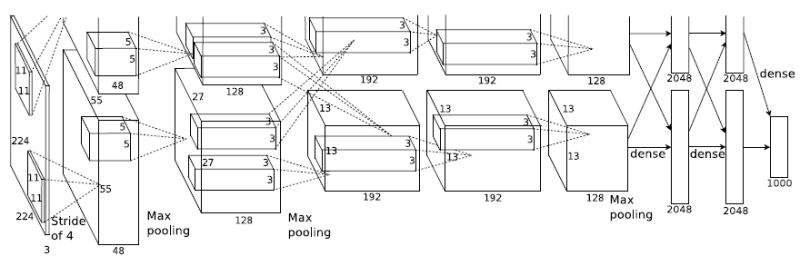

In [9]:
Image.open('Alexnet.png')

## AlexNet의 특징  
* 활성화 함수: 처음으로 ReLU 사용.  
Tanh, Sigmoid function에 비해 6배 빠르게 원하는 수준 이하의 error rate에 도달.  

* Over-fitting 방지를 위해 도입한 방법    
Data augmentation : 데이터셋 이미지를 좌우 반전을 시키거나 (flip augmentation),  
이미지를 잘라서 (Crop augmentation) 데이터 수를 늘림. 또 RGB   값을 조정하여 (jittering) 데이터 수를 늘림.  
Dropout: rate 0.5
Norm layer 사용 : 원시적인 형태의 batch normalization , 지금은 쓰이지 않음  
  
- Batch size 128  
- SGD momentum 0.9  
- learning rate 1e-2 , validation accuracy에 따라 manual 하게 낮춤  
- L2 weigh decay 5e-4  
- 7 CNN ensemble : error 18.2 % --> 15.4%  

In [2]:
class AlexNet(nn.Module):
    def __init__(self,classes):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=4),
            nn.LocalResponseNorm(size=5,k=2),
            nn.ReLU()
        )
        
        self.sub_sampling_layer1 = nn.MaxPool2d(kernel_size=3,stride=2)

        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2),
            nn.LocalResponseNorm(size=5,k=2),
            nn.ReLU()
        )

        self.sub_sampling_layer2 = nn.MaxPool2d(kernel_size=3,stride=2)

        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.LocalResponseNorm(size=5,k=2),
            nn.ReLU()
        )

        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1),
            nn.LocalResponseNorm(size=5,k=2),
            nn.ReLU()
        )

        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.LocalResponseNorm(size=5,k=2),
            nn.ReLU()
        )

        self.sub_sampling_layer3 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        self.avg_pool = nn.AdaptiveAvgPool2d(output_size=6)
        
        self.flatten = nn.Flatten()
        
        self.fc_layer1 = nn.Sequential(
            nn.Linear(256*6*6,4096),
            nn.ReLU(),
            nn.Dropout(0.5)
        )

        self.fc_layer2 = nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5)
        )

        self.fc_layer3 = nn.Sequential(
            nn.Linear(4096,classes),
            nn.Softmax(dim=-1)
        )

    def forward(self,x):
        x = self.conv_layer1(x)
        x = self.sub_sampling_layer1(x)
        x = self.conv_layer2(x)
        x = self.sub_sampling_layer2(x)
        x = self.conv_layer3(x)
        x = self.conv_layer4(x)
        x = self.conv_layer5(x)
        x = self.sub_sampling_layer3(x)
        x = self.avg_pool(x)
        x = self.flatten(x)
        x = self.fc_layer1(x)
        x = self.fc_layer2(x)
        x = self.fc_layer3(x)
        return x


In [5]:
model = AlexNet(1000)

In [6]:
summary(model,(3,230,230))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
 LocalResponseNorm-2           [-1, 96, 55, 55]               0
              ReLU-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
 LocalResponseNorm-6          [-1, 256, 27, 27]               0
              ReLU-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
LocalResponseNorm-10          [-1, 384, 13, 13]               0
             ReLU-11          [-1, 384, 13, 13]               0
           Conv2d-12          [-1, 384, 13, 13]       1,327,488
LocalResponseNorm-13          [-1, 384, 13, 13]               0
             ReLU-14          [-1, 384,